# Logistic regression

## Importation des librairies

In [33]:
import os  #Ce module est une bibliothèque dédié aux besoins de gestion de fichiers et de dossiers.
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm, trange
import numpy as np
import os.path

In [36]:
#importation des données :

data_dir = 'data\Garbage classification\Garbage classification'
classes = os.listdir(data_dir)
print(classes)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [37]:
dataset = datasets.ImageFolder(data_dir,transform = transforms.Compose([
    transforms.Resize((128,128)),transforms.ToTensor()]))

print(len(dataset))

2527


##### Le dataset contient 2527 images. Nous allons diviser notre dataset en 3 ensembles :
  train set (60%)
 – validation set (20%)
 – test set (20%)

Label: plastic


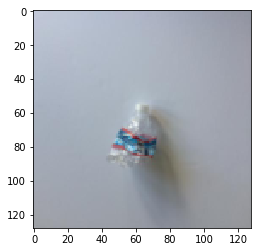

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_sample(img, label):
    print("Label:", dataset.classes[label])
    plt.imshow(img.permute(1, 2, 0)) #Réarrangement du tenseur en prenant en compte l'ordre désiré.
    
img, label = dataset[2000]
show_sample(img, label)

In [38]:
from torch.utils.data import random_split

train_set, validation_set, test_set = random_split(dataset, [1517, 505, 505])

In [11]:
print("Nombre d'images contenues dans le train set: {}".format(len(train_set)))
print("Nombres d'images contenues dans le test set: {}".format(len(test_set)))
print("Nombres d'images contenues dans le validation set: {}".format(len(validation_set)))

Nombre d'images contenues dans le train set: 1517
Nombres d'images contenues dans le test set: 505
Nombres d'images contenues dans le validation set: 505


##### Ensuite, On utilisera un DataLoader qui se chargera de mélanger et de grouper en lots les données.

In [39]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=20, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=20, shuffle=False)

##### Maintenant que nos data loaders sont prêts, nous pouvons définir et entrainer notre modèle. Dans le cadre de ce projet, nous avons choisi le réseau de neurones convolutifs (CNN). En particulier, ResNet-18 qui est formé, en profondeur, de 18 couches.

In [13]:
import torchvision.models as models
model = models.resnet18(pretrained = True)

import torch.nn as nn

# Fonction de perte (Loss function) et l'Optimizer :
criterion = nn.CrossEntropyLoss()  # Calculer l’erreur entre la prévision du réseau et la valeur réelle.
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) #algorithme d'optimisation

for epoch in trange(3):  
    for images, labels in tqdm(train_loader):
        # Réinitialisation du gradient :
        optimizer.zero_grad()

        # Forward pass
        x = images  
        y = model(x)  #calcul de la sortie du réseau
        loss = criterion(y, labels) #calcul de la perte
        
        # Backward pass
        loss.backward() # rétro-propagation de la correction d’erreur dans les couches antérieures du réseau
        optimizer.step() #correction des poids synaptiques à partir des gradients calculés

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/76 [00:01<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

Test

In [14]:
# Test
correct = 0
total = len(test_set)

with torch.no_grad():
    # Itération sur les minibatchs du test set  
    for images, labels in tqdm(test_loader):
        # Forward pass
        x = images  
        y = model(x)

        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())

print('Test accuracy: {}'.format(correct/total))

  0%|          | 0/26 [00:00<?, ?it/s]

Test accuracy: 0.7188118696212769


In [15]:
import pickle

# Saving model to disk
pickle.dump(model, open('model.pkl','wb'))